# Solución correspondiente a dos hemisferios a potenciales opuestos


Aquí resolveremos numéricamente el problema de una cáscara con sus hemisferios a potenciales opuestos. La solución analítica se la puede encontrar, por ejemplo en: http://www.famaf.unc.edu.ar/~reula/Docencia/Electromagnetismo/electrodynamics.pdf, página 81.

Debido a la simetría axial solución se puede expresar como suma de polinomios de Legendre $P_n(x)$, donde $x=cos(\theta)$ y potencias de r, la coordenada radial.

$$
\phi(x,r) = \sum_{n=0}^{\infty} A_n r^{-(n+1)}P_n(x)
$$

Supondremos la cáscara tiene radio a y reescalaremos la variable radia como $r\to \frac{r}{a}$ de esa manera queda adimensional y la cáscara a radio unidad.

Debemos calcular ahora los coeficientes $A_n$. Notemos que $A_{n2}=0 \;\;\; \forall n$ ya que 
la cáscara tiene simetría impar ante cambios $x \to -x$ y por lo tanto ninguno de los polinomios pares puede contribuir.

Los impares se calculan imponiendo la condición de contorno: 
$$
\phi(x,1) = V_0 \theta(x)
$$
donde $\theta$ es la función escalón. 
Tomaremos $V_0=1$ en lo que sigue. 
Siempre se puede reescalear la solución al final.

Tenemos así que (recordando que la cáscara está a $r=1$),

$$
\theta(x) = \sum_{n=0}^{\infty} A_n P_n(x),
$$

multiplicando por $P_{m}(x)$ ambos lados e integrando en $[-1,1]$ obtenemos, 

$$
\int_{-1}^{1} P_n(x) \theta(x) dx = \frac{2}{2n+1} A_n.
$$
Haciendo solo as integrales entre $[0,1]$ y multiplicando or $2$, (ya que las funciones son impares) obtenemos,

$$
A_n = (2n+1) \int_0^1 P_n(x) dx \;\;\; n \; \mbox{impar}.
$$

Haremos estos cálculos analíticamente y luego graficaremos la solución.

Para ilustrar el caso donde es conveniente hacer las integrales en forma numérica consideraremos el caso,

$$
\phi(x,1) = V_0 \theta(x) e^{-x^2}.
$$

Los coeficientes vendrán dados por:
$$
\theta(x) e^{-x^2} = \sum_{n=0}^{\infty} B_n P_n(x),
$$

$$
B_n = (2n+1) \int_0^1 P_n(x) e^{-x^2} dx \;\;\; n \; \mbox{impar}.
$$

A estos los calcularemos numéricamente.

Primero definimos todo lo necesario de las librerías de Python.

In [1]:
%matplotlib inline
#%matplotlib notebook
#from sympy import *
from sympy import simplify, diff, integrate, Integral, Sum, lambdify, legendre
import sympy.functions as sp 
#from numpy import *
import numpy as np
#from sympy.plotting import plot
import matplotlib.pyplot as mpl
#import matplotlib as mpl
#import matplotlib as mpl
#import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import animation, rc
from IPython.display import HTML
#init_printing(use_unicode=True)
#x, y, z, u, v, r = symbols('x y z, u, v, r')
from sympy.abc import x, y, r, n, k, m
#k, m, n = symbols('k m n', integer=True)
#f, step, potential = symbols('f step potential', cls=Function)
#var('n m x')
#theta = Symbol("theta")
#phi = Symbol("phi")

Luego probamos que las definiciones funcionan correctamente con algunos ejemplos:

In [2]:
sp.legendre(3,x)

5*x**3/2 - 3*x/2

Podemos por ejemplo integrarlos (o diferenciarlos, o hacer otras operaciones con ellos), por ejemplo

In [3]:
integrate(sp.legendre(5,x),x)

21*x**6/16 - 35*x**4/16 + 15*x**2/16

Por ejemplo podemos probar una de las fórmulas más útiles para hacer integrales usando los polinomios de Legendre:

$$
\frac{dP_{l+1}}{dx} - \frac{dP_{l-1}}{dx} - l(l+1)P_{l} = 0
$$

Solo se puede constatar la fórmula para valores particulares (no la sabe simplificar completamente). Poner cualquier valor entero positivo (>1) para k.

In [4]:
k=5
diff(sp.legendre(k+1,x),x) - diff(sp.legendre(k-1,x),x) - (2*k+1)*sp.legendre(k,x)

0

Grafiquemos ahora algunos polinomios de Legendre. Para ello primero los transformamos en funciones propiamente dichas (y no símbolos) y lo hacemos adaptados para ser graficados con las facilidades numéricas the Python (numpy).

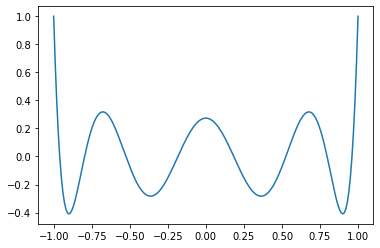

In [7]:
x_vals=np.linspace(-1,1,200)
f = lambdify(x, sp.legendre(8,x),"numpy")
l_vals=f(x_vals)
mpl.plot(x_vals,l_vals)
#mpl.plot(x_vals,sp.legendre(8,x))

Primero hacemos el caso analítico:

Las integrales se pueden hacer o bien analíticamente o bien numéricamente. En el caso que sigue tomamos una grilla de L puntos e integramos numéricamente. Esto siempre funciona, pero hay que tener cuidado que la aproximación sea buena, en particular para polinomios de orden alto hay que tomar intervalos de grilla bien pequeños.


In [8]:
L=200 # números de puntos de grilla, ajustar al grado del polinomio, se necesitan al menos 10 puntos por cada l.
#L = 100

In [9]:
Integral(sp.legendre(3,x),(x,0,1)).as_sum(L)

-16001/128000

También en algunos casos las integrales se pueden hacer en forma exacta.

In [10]:
Integral(sp.legendre(3,x),(x,0,1)).doit()

-1/8

Primero hacemos un cálculo algebraico, en el caso que el potencial viene dado por $\theta(x)$. Calculamos los coeficientes (solo para los n impares, n=2m+1). 

In [11]:
A=lambda n: (2*(2*n+1)+1)*Integral(sp.legendre(2*n+1,x),(x,0,1)).doit()

In [12]:
A(3)

-75/128

In [13]:
A(15).evalf()

-0.284414382185787

Contruimos el potencial en la frontera (r=1) para saber que las condiciones de contorno se satisfacen aproximadamente.

In [14]:
N=15 # número de términos en la suma
#step_approx=lambdify(x,Sum(A(m).doit()*sp.legendre(2*m+1,x),(m,0,N)).doit(),"numpy")
step_approx=lambdify(x,Sum(A(m).evalf()*sp.legendre(2*m+1,x),(m,0,N)).doit(),"numpy")

Graficamos la aproximación y comparamos con la solución exacta. Note que si ponemos muchos términos la solución no converge.

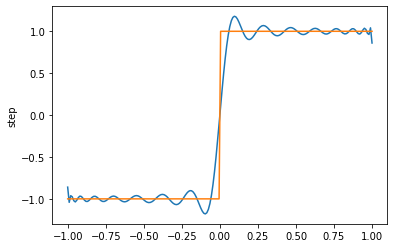

In [15]:
x_vals = np.linspace(-1, 1, 200)
z_vals = step_approx(x_vals)
step = lambdify(x,sp.sign(x),"numpy")
f_vals = step(x_vals)
mpl.plot(x_vals, z_vals, x_vals, f_vals)
mpl.ylabel("step")
mpl.show()

Generamos ahora el potencial completo:

In [16]:
potential=lambdify((x,r),Sum(A(m).evalf()*sp.legendre(2*m+1,x)*r**(-2*(m+1)),(m,0,N)).doit(),"numpy")

Graficamos la aproximación a la función escalón que calculamos:

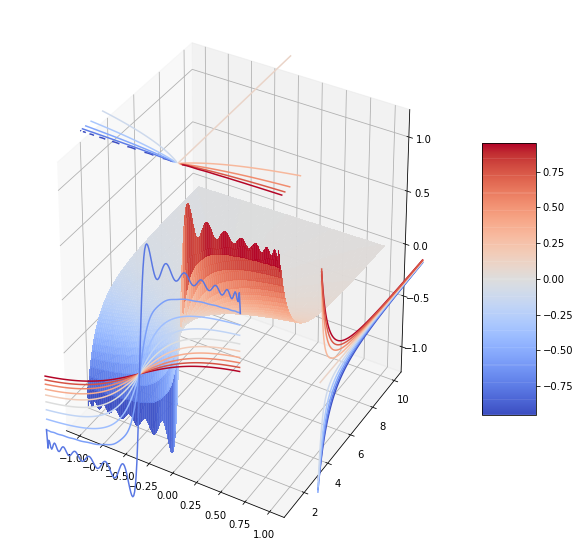

In [18]:
y_vals = np.linspace(1,10,200)
X,Y = np.meshgrid(x_vals,y_vals)
z_vals = potential(X,Y)
fig = mpl.figure(figsize = (10,10))
ax = fig.gca(projection='3d')
ax.set_zlim(-1.2, 1.2)
surf = ax.plot_surface(X,Y,z_vals, rstride=2, alpha=0.9, cstride=2, cmap=cm.coolwarm,linewidth=0, antialiased=False)
levels = np.arange(-1., 1., 0.2)
levels_y = np.arange(0.9, 2., 0.1)
cset = ax.contour(X, Y, z_vals, levels, zdir='z', offset=1.5, cmap=cm.coolwarm)
cset = ax.contour(X, Y, z_vals, levels, zdir='x', offset=1.4, cmap=cm.coolwarm)
cset = ax.contour(X, Y, z_vals, levels_y, zdir='y', offset=-2, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
mpl.show()

Ahora calcularemos el segundo caso, $V(x) = \theta(x)\times e^{-x^2}$. Primero lo hacemos con un número pequeño de puntos en la integración numérica (20).

In [19]:
B_20=lambda m: (2*(2*m+1)+1)*Integral(sp.legendre(2*m+1,x)*sp.exp(-x*x),(x,0,1)).as_sum(20)

Constatamos que funciona:

In [20]:
B_20(3).evalf()

-0.632625075685925

Ahora ponemos los números en una tupla para poderlos graficar de forma simple.

In [21]:
E_20=[]
for j in range(10):
        E_20.append(B_20(j))

Repetimos con más puntos para ver la diferencia en la integración numérica:

In [22]:
print(L)
#L = 100

200


In [23]:
B_200=lambda m: (2*(2*m+1)+1)*Integral(sp.legendre(2*m+1,x)*sp.exp(-x*x),(x,0,1)).as_sum(200)


In [ ]:
E_200=[]
for j in range(10):
        E_200.append(B_200(j))

In [ ]:
mpl.plot(range(10),E_200,'bo', range(10),E_20, 'r^')

Vemos que se pierde precisión a medida que crece el orden del polinomio como era de esperarse. Ahora ya estamos en condiciones de proseguir. 

Chequeamos que la condición de contorno se satisfaga. Para ello sumamos los 20 primeros términos de la suma. (Vea que sucede si toma más términos).

In [ ]:
N=20 # número de términos en la suma
step=lambdify(x,Sum(B_200(m).doit()*sp.legendre(2*m+1,x),(m,0,N)).doit(),"numpy")

Graficamos la aproximación a la función escalón que calculamos:

In [ ]:
x_vals = np.linspace(-1, 1, 200)
z_vals = step(x_vals)
f = lambdify(x,sp.sign(x)*sp.exp(-x*x),"numpy")
f_vals = f(x_vals)
mpl.plot(x_vals, z_vals, x_vals, f_vals)
mpl.ylabel("step")
mpl.show()

Ahora calculamos una aproximación a la solución completa, también tomando 20 términos de la serie.

In [ ]:
potential=lambdify((x,r),Sum(B_200(m).doit()*sp.legendre(2*m+1,x)*r**(-2*(m+1)),(m,0,N)).doit(),"numpy")

Finalmente la graficamos:

In [ ]:
y_vals = np.linspace(1,10,200)
X,Y = np.meshgrid(x_vals,y_vals)
z_vals = potential(X,Y)
fig = mpl.figure()
ax = fig.gca(projection='3d')
ax.set_zlim(-1.2, 1.2)
surf = ax.plot_surface(X,Y,z_vals, rstride=2, alpha=0.9, cstride=2, cmap=cm.coolwarm,linewidth=0, antialiased=False)
levels = np.arange(-1., 1., 0.2)
levels_y = np.arange(0.9, 2., 0.1)
cset = ax.contour(X, Y, z_vals, levels, zdir='z', offset=1.5, cmap=cm.coolwarm)
cset = ax.contour(X, Y, z_vals, levels, zdir='x', offset=1.4, cmap=cm.coolwarm)
cset = ax.contour(X, Y, z_vals, levels_y, zdir='y', offset=-2, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
mpl.show()

Si quiere tener mejor control del gráfico (agrandarlo, rotarlo, etc.) tiene que correr la versión .py en idle, iPython o spyder. En esos entornos se genera un gráfico (no una figura embebida como aquí)  donde se pueden hacer esas cosas.